In [26]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
def read_river(river_name, ps):
    river_flow = pd.read_csv(f'{river_name}_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
    river_flow['date'] = pd.to_datetime(river_flow.drop(columns='flow'))
    river_flow.set_index('date', inplace=True)
    river_flow = river_flow.drop(columns=['year', 'month', 'day'])
    if ps == 'primary':
        river_flow = river_flow.rename(columns={'flow': 'Primary River Flow'})
    elif ps == 'secondary':
        river_flow = river_flow.rename(columns={'flow': 'Secondary River Flow'})
    return river_flow

In [70]:
def plot_river(river_flow):
    fig, axs = plt.subplots(3, 1, figsize=(15, 8))
    for ax in [axs[0], axs[1]]:
        river_flow['Primary River Flow'].plot(ax=ax)
    axs[0].set_xlim(dt.datetime(2015, 1, 1), dt.datetime(2017, 12, 31));
    axs[1].set_xlim(dt.datetime(2007, 1, 1), dt.datetime(2020, 12, 31));
    fig.suptitle(primary_river_name);
    return fig, axs[2]

In [87]:
def search_gaps(river_flow, ax):
    diffy = river_flow.index[1:] - river_flow.index[:-1]
    print(diffy)
    ax.plot(river_flow.index[:-1], diffy, 'x-');
    ax.set_xlim(dt.datetime(2007, 1, 1), dt.datetime(2020, 12, 31));
    ax.set_ylim(-1e15, 1e15)
    print(river_flow[river_flow['Primary River Flow'] != river_flow['Primary River Flow']])
    print(river_flow[np.isnan(river_flow['Primary River Flow'])])
    return diffy

TimedeltaIndex(['1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days',
                ...
                '1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days'],
               dtype='timedelta64[ns]', name='date', length=21566, freq=None)
Empty DataFrame
Columns: [Primary River Flow]
Index: []
Empty DataFrame
Columns: [Primary River Flow]
Index: []


Primary River Flow    76.3125
Name: 2019-04-06 00:00:00, dtype: float64

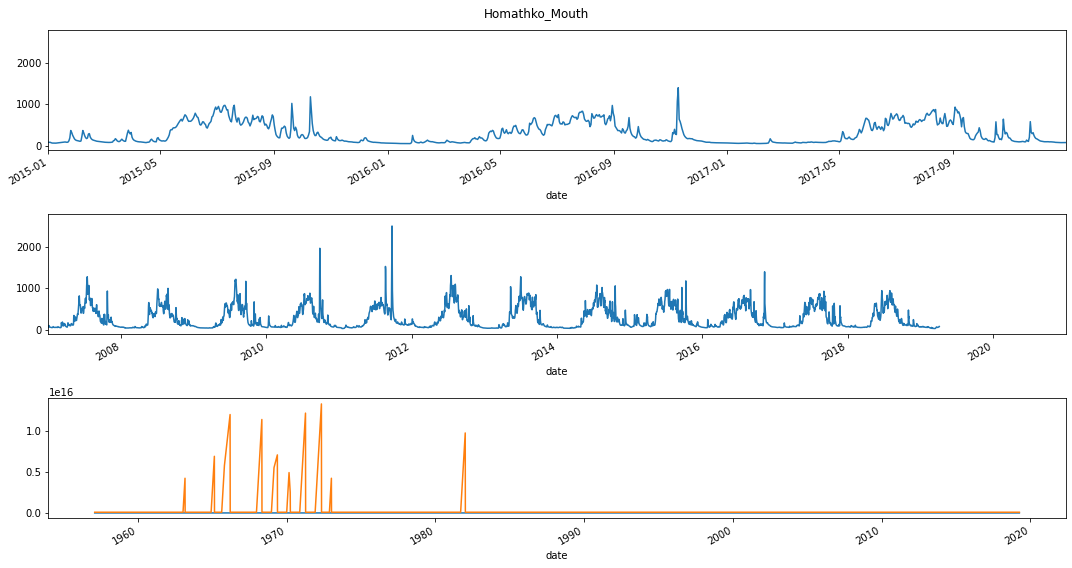

In [49]:
primary_river_name = 'Homathko_Mouth'
river_flow = read_river(primary_river_name, 'primary')
fig, ax = plot_river(river_flow)
search_gaps(river_flow, ax)
fig.tight_layout()
river_flow.iloc[-1]

TimedeltaIndex(['1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days',
                ...
                '1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days'],
               dtype='timedelta64[ns]', name='date', length=9424, freq=None)
Empty DataFrame
Columns: [Primary River Flow]
Index: []
Empty DataFrame
Columns: [Primary River Flow]
Index: []


Primary River Flow    17.26168
Name: 2019-04-06 00:00:00, dtype: float64

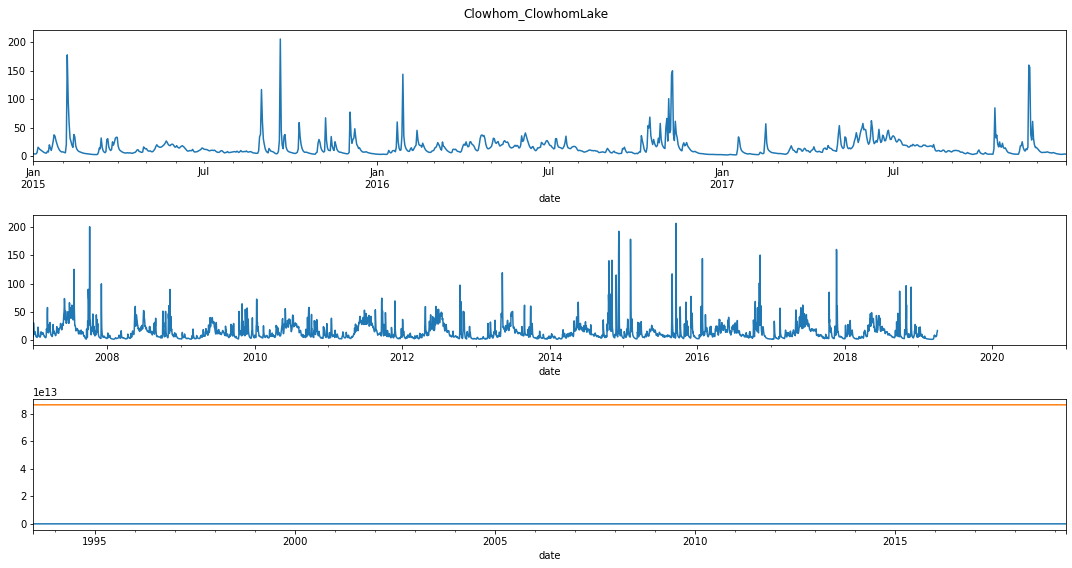

In [50]:
primary_river_name = 'Clowhom_ClowhomLake'
river_flow = read_river(primary_river_name, 'primary')
fig, ax = plot_river(river_flow)
search_gaps(river_flow, ax)
fig.tight_layout()
river_flow.iloc[-1]

TimedeltaIndex(['1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days',
                ...
                '1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days'],
               dtype='timedelta64[ns]', name='date', length=21699, freq=None)
Empty DataFrame
Columns: [Primary River Flow]
Index: []
Empty DataFrame
Columns: [Primary River Flow]
Index: []


Primary River Flow    0.74579
Name: 2019-04-22 00:00:00, dtype: float64

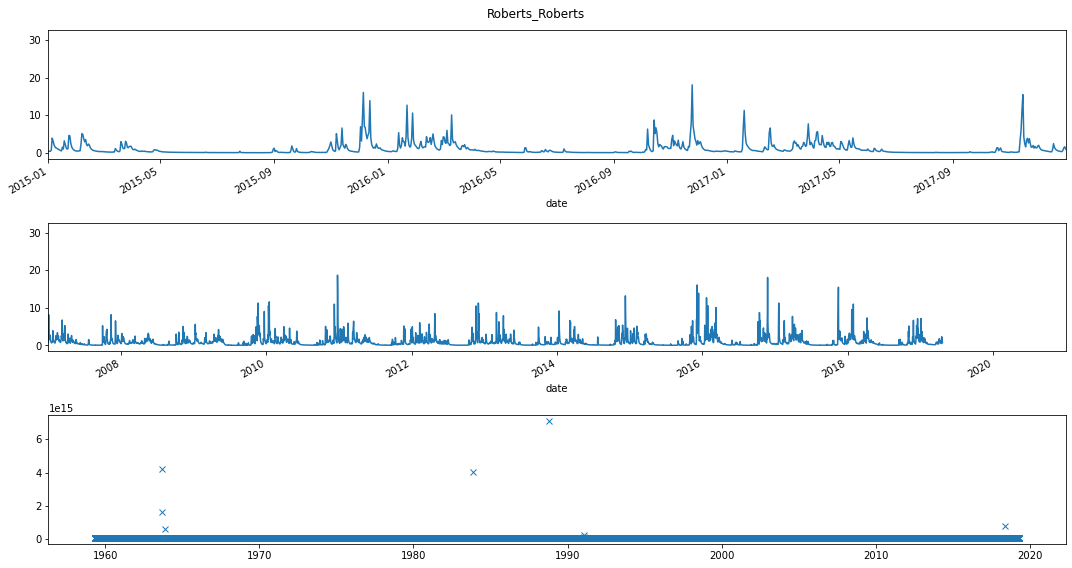

In [79]:
primary_river_name = 'Roberts_Roberts'
river_flow = read_river(primary_river_name, 'primary')
fig, ax = plot_river(river_flow)
diffy = search_gaps(river_flow, ax)
fig.tight_layout()
river_flow.iloc[-1]

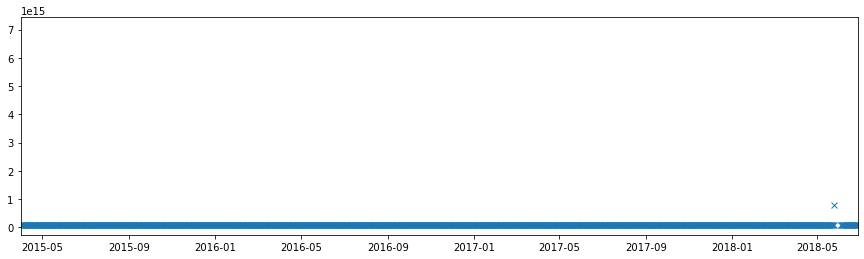

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
#river_flow['Primary River Flow'].plot(ax=ax, marker='x')
plt.plot(river_flow.index[:-1], diffy, 'x')
ax.set_xlim(dt.datetime(2015, 4, 1), dt.datetime(2018, 6, 27));

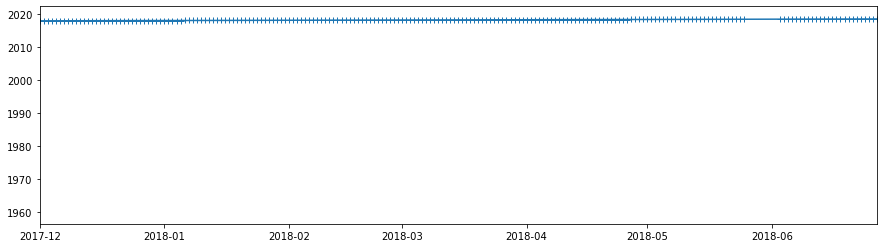

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(river_flow.index, river_flow.index, '+-')
ax.set_xlim(dt.datetime(2017, 12, 1), dt.datetime(2018, 6, 27));

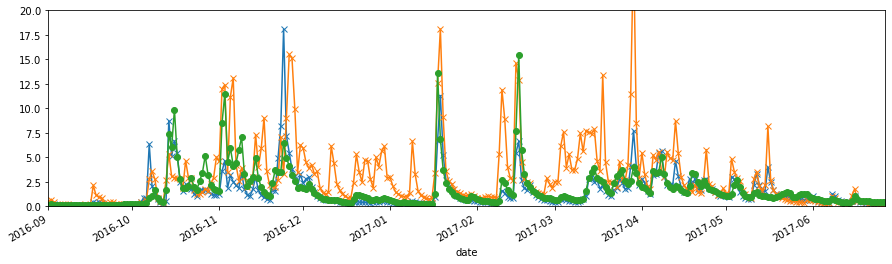

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
primary_river_name = 'Roberts_Roberts'
river_flow = read_river(primary_river_name, 'primary')
nicomekl = read_river('Nicomekl_203', 'primary')
river_flow['Primary River Flow'].plot(ax=ax, marker='x')
nicomekl['Primary River Flow'].plot(ax=ax, marker='x')
englishman = read_river('Englishman', 'primary')
(englishman['Primary River Flow']/10.).plot(ax=ax, marker='o')
ax.set_xlim(dt.datetime(2016, 9, 1), dt.datetime(2017, 6, 27));
ax.set_ylim(0, 20);

TimedeltaIndex(['1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days',
                ...
                '1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days'],
               dtype='timedelta64[ns]', name='date', length=23893, freq=None)
Empty DataFrame
Columns: [Primary River Flow]
Index: []
Empty DataFrame
Columns: [Primary River Flow]
Index: []


Primary River Flow    188.0
Name: 2019-04-06 00:00:00, dtype: float64

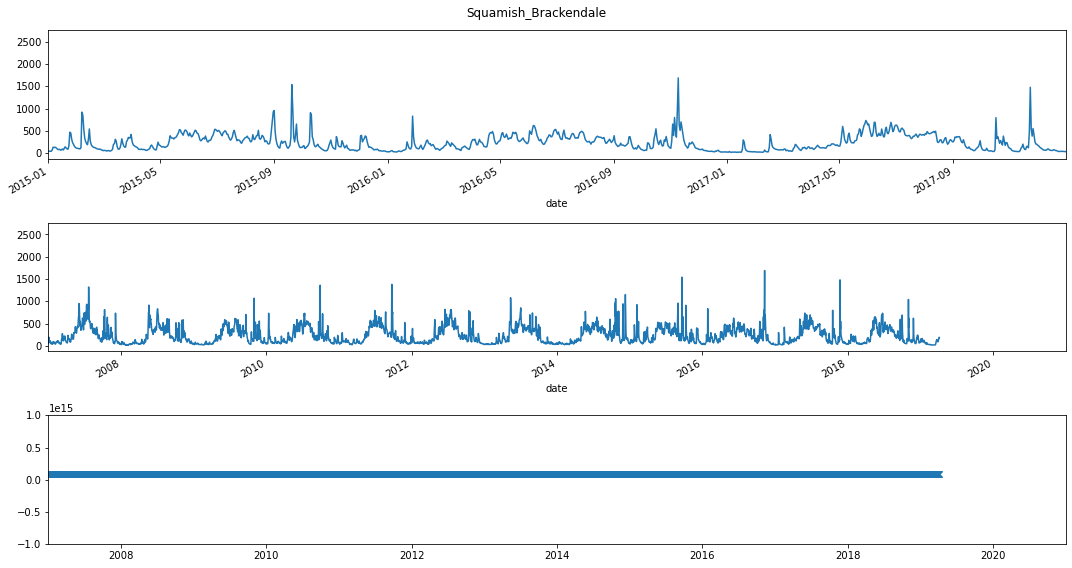

In [88]:
primary_river_name = 'Squamish_Brackendale'
river_flow = read_river(primary_river_name, 'primary')
fig, ax = plot_river(river_flow)
diffy = search_gaps(river_flow, ax)
fig.tight_layout()
river_flow.iloc[-1]

TimedeltaIndex(['1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days',
                ...
                '1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days'],
               dtype='timedelta64[ns]', name='date', length=20410, freq=None)
Empty DataFrame
Columns: [Primary River Flow]
Index: []
Empty DataFrame
Columns: [Primary River Flow]
Index: []


Primary River Flow    36.98125
Name: 2019-04-06 00:00:00, dtype: float64

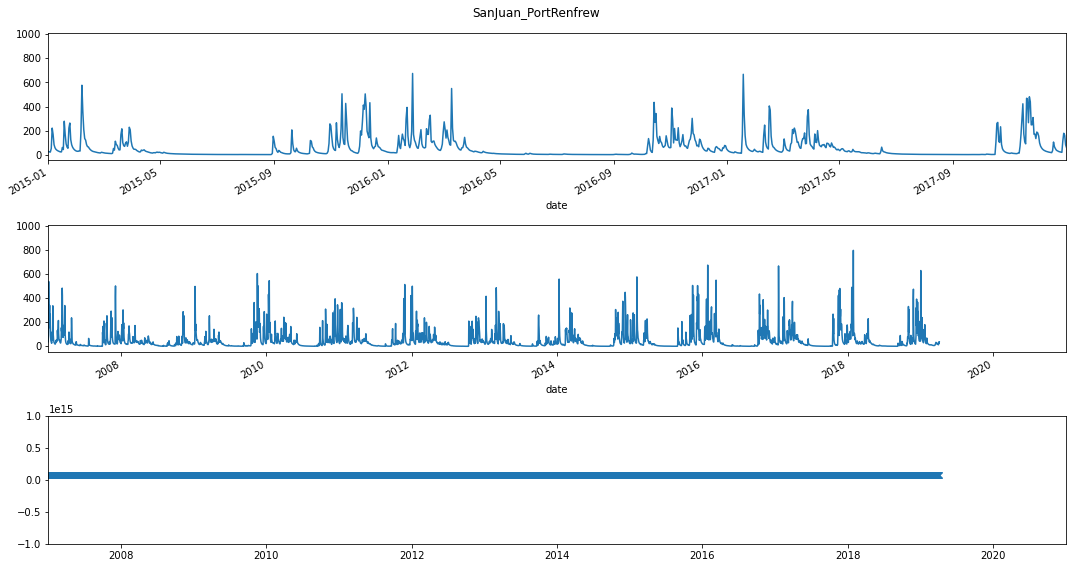

In [89]:
primary_river_name = 'SanJuan_PortRenfrew'
river_flow = read_river(primary_river_name, 'primary')
fig, ax = plot_river(river_flow)
diffy = search_gaps(river_flow, ax)
fig.tight_layout()
river_flow.iloc[-1]

TimedeltaIndex(['1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days',
                ...
                '1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days'],
               dtype='timedelta64[ns]', name='date', length=22774, freq=None)
Empty DataFrame
Columns: [Primary River Flow]
Index: []
Empty DataFrame
Columns: [Primary River Flow]
Index: []


Primary River Flow    101.6593
Name: 2019-04-06 00:00:00, dtype: float64

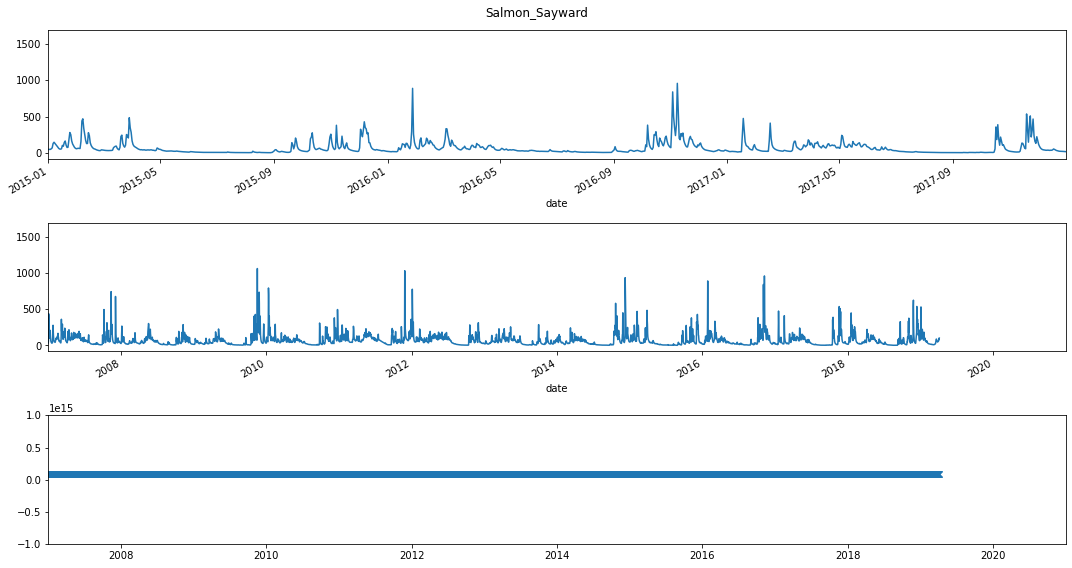

In [90]:
primary_river_name = 'Salmon_Sayward'
river_flow = read_river(primary_river_name, 'primary')
fig, ax = plot_river(river_flow)
diffy = search_gaps(river_flow, ax)
fig.tight_layout()
river_flow.iloc[-1]

TimedeltaIndex(['2 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days',
                ...
                '1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days'],
               dtype='timedelta64[ns]', name='date', length=16362, freq=None)
Empty DataFrame
Columns: [Primary River Flow]
Index: []
Empty DataFrame
Columns: [Primary River Flow]
Index: []


Primary River Flow    10.3437
Name: 2019-04-12 00:00:00, dtype: float64

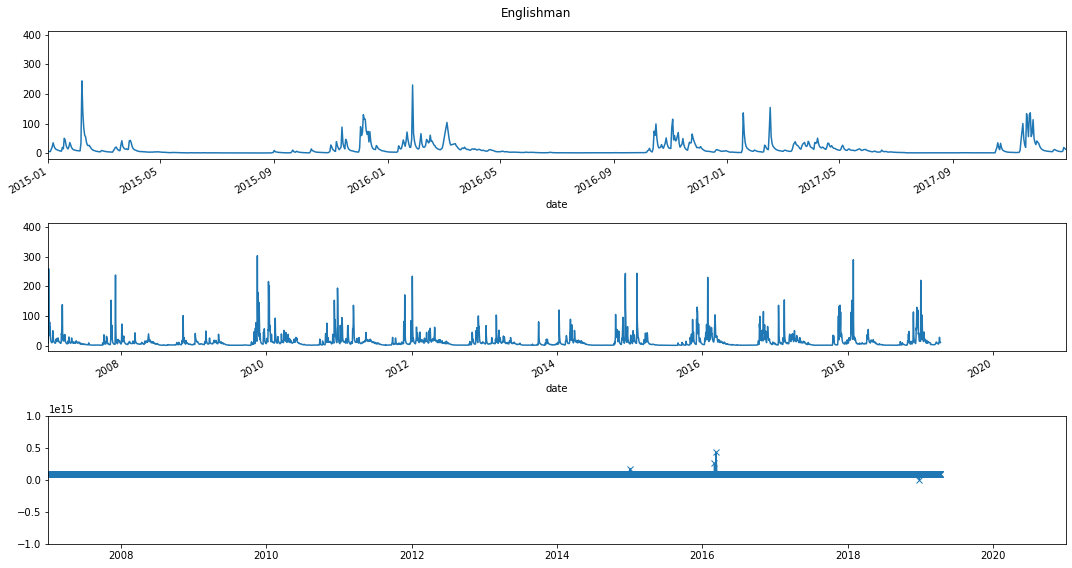

In [91]:
primary_river_name = 'Englishman'
river_flow = read_river(primary_river_name, 'primary')
fig, ax = plot_river(river_flow)
diffy = search_gaps(river_flow, ax)
fig.tight_layout()
river_flow.iloc[-1]

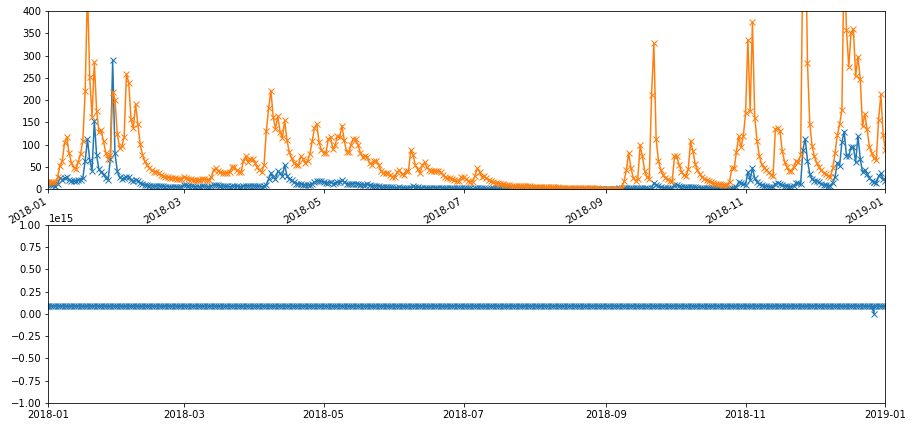

In [104]:
fig, axs = plt.subplots(2, 1, figsize=(15, 8))
river_flow['Primary River Flow'].plot(ax=axs[0], marker='x')
salmon = read_river('Salmon_Sayward', 'primary')
salmon['Primary River Flow'].plot(ax=axs[0], marker='x')
axs[1].plot(river_flow.index[:-1], diffy, 'x-')
for ax in axs:
    ax.set_xlim(dt.datetime(2018, 1, 1), dt.datetime(2019, 1, 1));
axs[1].set_ylim(-1e15, 1e15);
axs[0].set_ylim(0, 400);

In [105]:

def read_river_Theodosia():
    part1 = pd.read_csv('Theodosia_Scotty_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
    part2 = pd.read_csv('Theodosia_Bypass_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
    part3 = pd.read_csv('Theodosia_Diversion_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
    for part in [part1, part2, part3]:
        part['date'] = pd.to_datetime(part.drop(columns='flow'))
        part.set_index('date', inplace=True)
        part.drop(columns=['year', 'month', 'day'], inplace=True)
    part1 = part1.rename(columns={'flow': 'Scotty'})
    part2 = part2.rename(columns={'flow': 'Bypass'})
    part3 = part3.rename(columns={'flow': 'Diversion'})
    theodosia = (part1.merge(part2, how='inner', on='date')).merge(part3, how='inner', on='date')
    theodosia['Secondary River Flow'] = theodosia['Scotty'] + theodosia['Diversion'] - theodosia['Bypass']
    return theodosia

In [109]:
theodosia = read_river_Theodosia()
theodosia.keys()

Index(['Scotty', 'Bypass', 'Diversion', 'Secondary River Flow'], dtype='object')

Scotty Empty DataFrame
Columns: [Scotty, Bypass, Diversion, Secondary River Flow]
Index: []
Bypass Empty DataFrame
Columns: [Scotty, Bypass, Diversion, Secondary River Flow]
Index: []
Diversion Empty DataFrame
Columns: [Scotty, Bypass, Diversion, Secondary River Flow]
Index: []
Secondary River Flow Empty DataFrame
Columns: [Scotty, Bypass, Diversion, Secondary River Flow]
Index: []


Scotty                   9.673333
Bypass                   4.028101
Diversion               11.995680
Secondary River Flow    17.640912
Name: 2019-04-06 00:00:00, dtype: float64

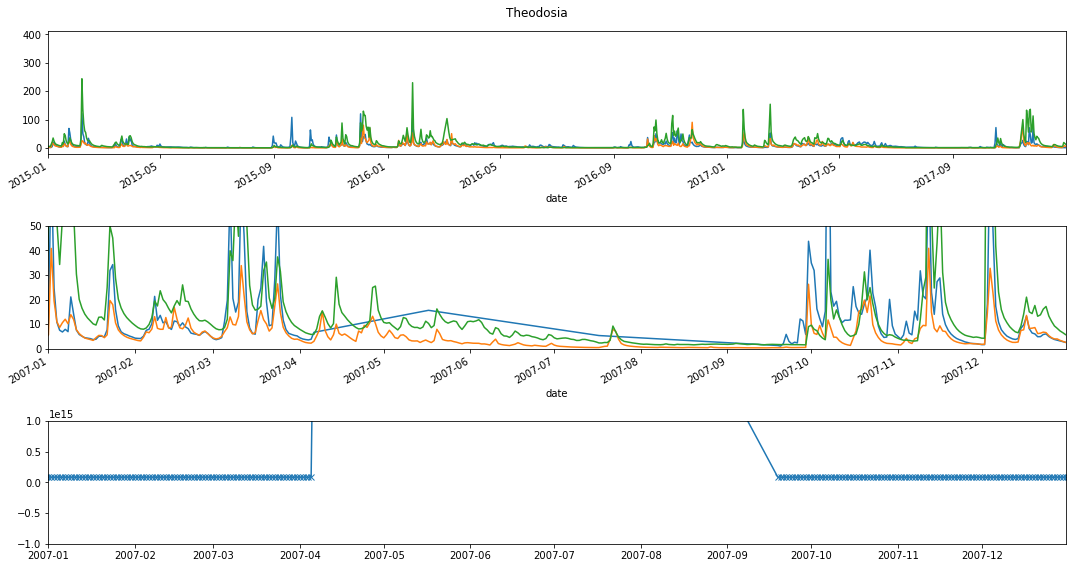

In [127]:
fig, axs = plt.subplots(3, 1, figsize=(15, 8))
roberts = read_river('Roberts_Roberts', 'primary')
englishman = read_river('Englishman', 'primary')
for ax in [axs[0], axs[1]]:
 #   theodosia['Scotty'].plot(ax=ax)
 #   theodosia['Bypass'].plot(ax=ax)
 #   theodosia['Diversion'].plot(ax=ax)
    theodosia['Secondary River Flow'].plot(ax=ax)
    (5*roberts['Primary River Flow']).plot(ax=ax)
    englishman['Primary River Flow'].plot(ax=ax)
axs[0].set_xlim(dt.datetime(2015, 1, 1), dt.datetime(2017, 12, 31));
axs[1].set_xlim(dt.datetime(2007, 1, 1), dt.datetime(2007, 12, 31));
fig.suptitle('Theodosia');
diffy = theodosia.index[1:] - theodosia.index[:-1]
axs[2].plot(theodosia.index[:-1], diffy, 'x-');
axs[2].set_xlim(dt.datetime(2007, 1, 1), dt.datetime(2007, 12, 31));
axs[2].set_ylim(-1e15, 1e15)
axs[1].set_ylim(0, 50)
for key in theodosia.keys():
    print(key, theodosia[theodosia[key] != theodosia[key]])
 
fig.tight_layout()
theodosia.iloc[-1]

TimedeltaIndex(['1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days',
                ...
                '1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days'],
               dtype='timedelta64[ns]', name='date', length=28682, freq=None)
Empty DataFrame
Columns: [Primary River Flow]
Index: []
Empty DataFrame
Columns: [Primary River Flow]
Index: []


Primary River Flow    385.1085
Name: 2019-04-13 00:00:00, dtype: float64

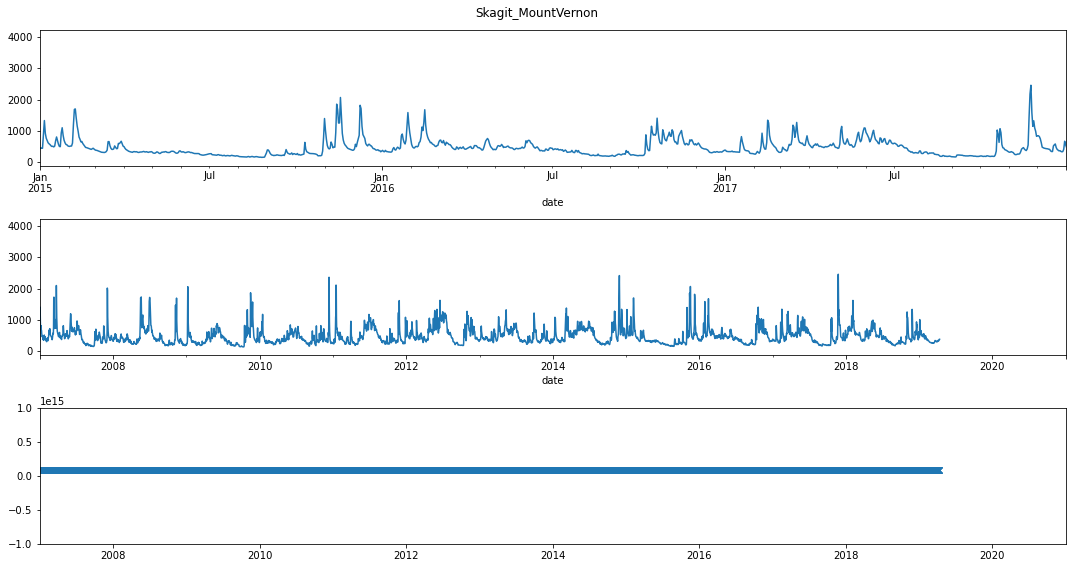

In [124]:
primary_river_name = 'Skagit_MountVernon'
river_flow = read_river(primary_river_name, 'primary')
fig, ax = plot_river(river_flow)
diffy = search_gaps(river_flow, ax)
fig.tight_layout()
river_flow.iloc[-1]

TimedeltaIndex(['1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days',
                ...
                '1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days'],
               dtype='timedelta64[ns]', name='date', length=20529, freq=None)
Empty DataFrame
Columns: [Primary River Flow]
Index: []
Empty DataFrame
Columns: [Primary River Flow]
Index: []


Primary River Flow    345.465
Name: 2019-04-18 00:00:00, dtype: float64

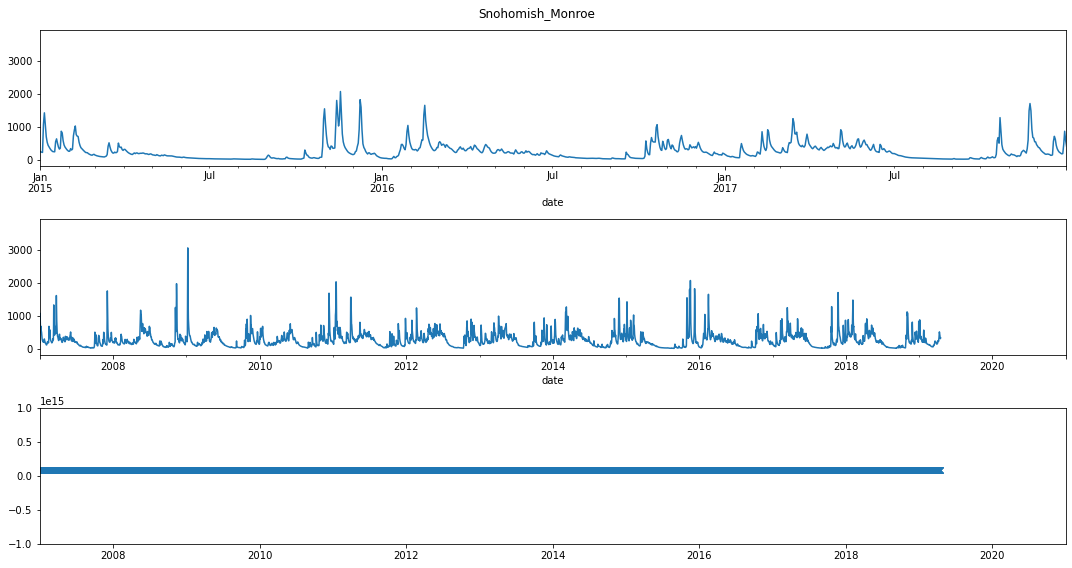

In [128]:
primary_river_name = 'Snohomish_Monroe'
river_flow = read_river(primary_river_name, 'primary')
fig, ax = plot_river(river_flow)
diffy = search_gaps(river_flow, ax)
fig.tight_layout()
river_flow.iloc[-1]

TimedeltaIndex(['1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days',
                ...
                '1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days'],
               dtype='timedelta64[ns]', name='date', length=26127, freq=None)
            Primary River Flow
date                          
1968-09-30                 NaN
1968-10-01                 NaN
1968-10-02                 NaN
1968-10-03                 NaN
1968-10-04                 NaN
...                        ...
1977-05-19                 NaN
1977-05-20                 NaN
1977-05-21                 NaN
1977-05-22                 NaN
1977-05-23                 NaN

[3158 rows x 1 columns]
            Primary River Flow
date                          
1968-09-30                 NaN
1968-10-01                 NaN
1968-10-02                 NaN
1968-10-03                 NaN
1968-10-04             

Primary River Flow    43.89104
Name: 2019-04-13 00:00:00, dtype: float64

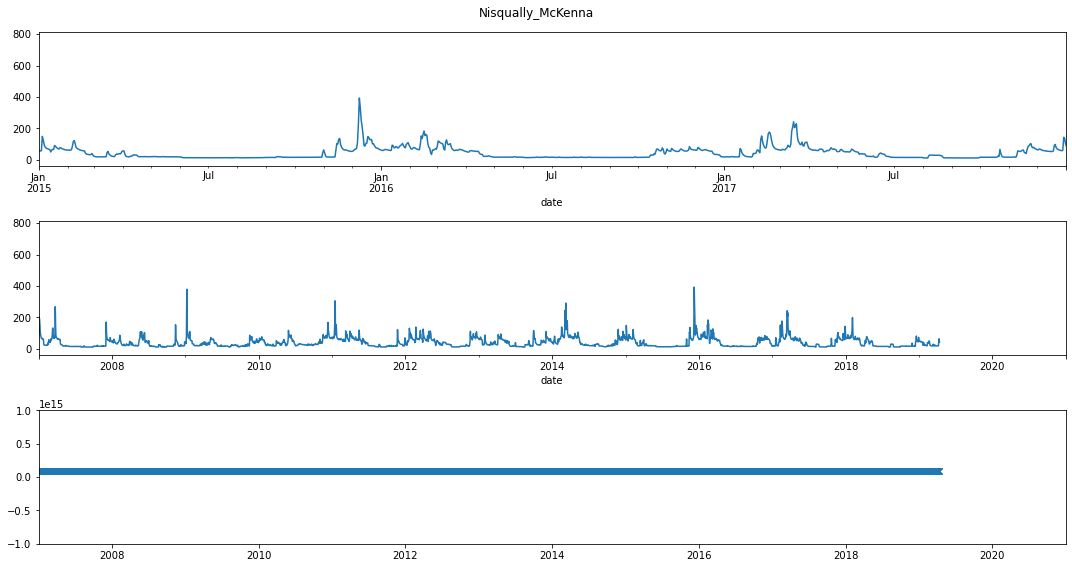

In [129]:
primary_river_name = 'Nisqually_McKenna'
river_flow = read_river(primary_river_name, 'primary')
fig, ax = plot_river(river_flow)
diffy = search_gaps(river_flow, ax)
fig.tight_layout()
river_flow.iloc[-1]

TimedeltaIndex(['1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days',
                ...
                '1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days'],
               dtype='timedelta64[ns]', name='date', length=39284, freq=None)
            Primary River Flow
date                          
1912-04-01                 NaN
1912-04-02                 NaN
1912-04-03                 NaN
1912-04-04                 NaN
1912-04-05                 NaN
...                        ...
1993-05-08                 NaN
1993-05-09                 NaN
1993-05-10                 NaN
1993-05-11                 NaN
1993-05-12                 NaN

[9921 rows x 1 columns]
            Primary River Flow
date                          
1912-04-01                 NaN
1912-04-02                 NaN
1912-04-03                 NaN
1912-04-04                 NaN
1912-04-05             

Primary River Flow    12.14791
Name: 2019-04-21 00:00:00, dtype: float64

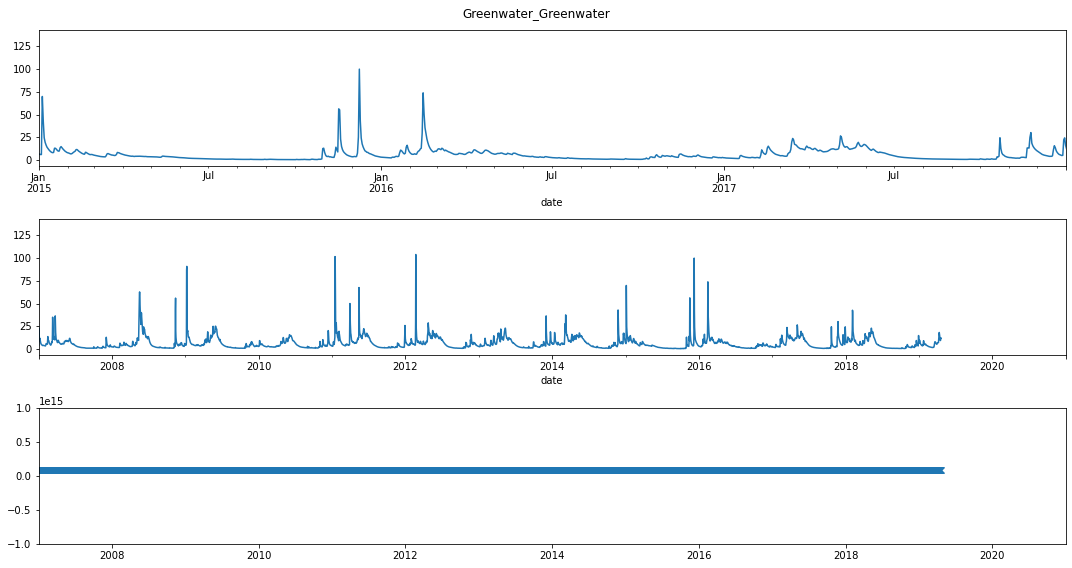

In [130]:
primary_river_name = 'Greenwater_Greenwater'
river_flow = read_river(primary_river_name, 'primary')
fig, ax = plot_river(river_flow)
diffy = search_gaps(river_flow, ax)
fig.tight_layout()
river_flow.iloc[-1]

TimedeltaIndex(['1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days',
                ...
                '1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days'],
               dtype='timedelta64[ns]', name='date', length=39419, freq=None)
Empty DataFrame
Columns: [Primary River Flow]
Index: []
Empty DataFrame
Columns: [Primary River Flow]
Index: []


Primary River Flow    1359.028
Name: 2020-01-31 00:00:00, dtype: float64

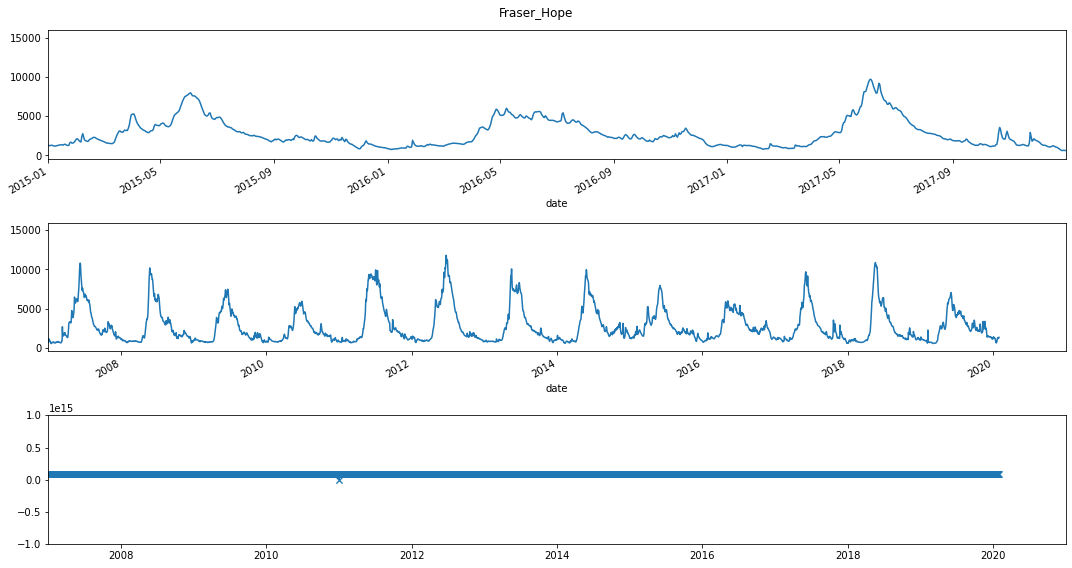

In [131]:
primary_river_name = 'Fraser_Hope'
river_flow = read_river(primary_river_name, 'primary')
fig, ax = plot_river(river_flow)
diffy = search_gaps(river_flow, ax)
fig.tight_layout()
river_flow.iloc[-1]

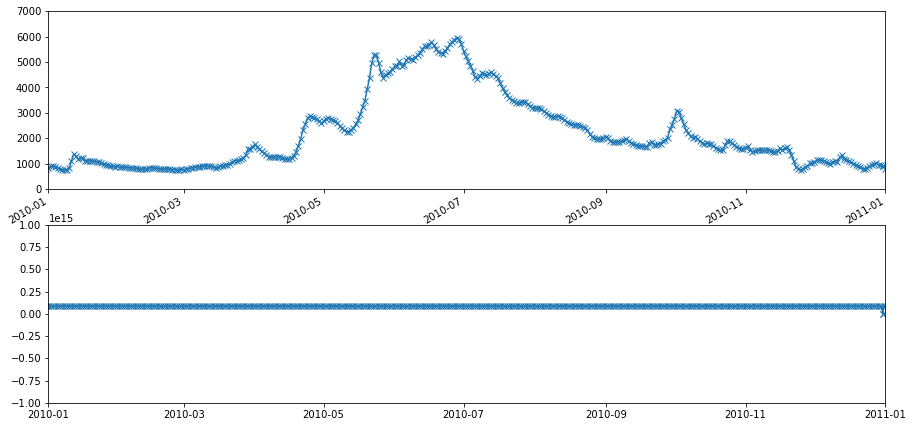

In [135]:
fig, axs = plt.subplots(2, 1, figsize=(15, 8))
river_flow['Primary River Flow'].plot(ax=axs[0], marker='x')
axs[1].plot(river_flow.index[:-1], diffy, 'x-')
for ax in axs:
    ax.set_xlim(dt.datetime(2010, 1, 1), dt.datetime(2011, 1, 1));
axs[1].set_ylim(-1e15, 1e15);
axs[0].set_ylim(0, 7000);

TimedeltaIndex(['1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days',
                ...
                '1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days'],
               dtype='timedelta64[ns]', name='date', length=12417, freq=None)
Empty DataFrame
Columns: [Primary River Flow]
Index: []
Empty DataFrame
Columns: [Primary River Flow]
Index: []


Primary River Flow    9.653576
Name: 2021-01-03 00:00:00, dtype: float64

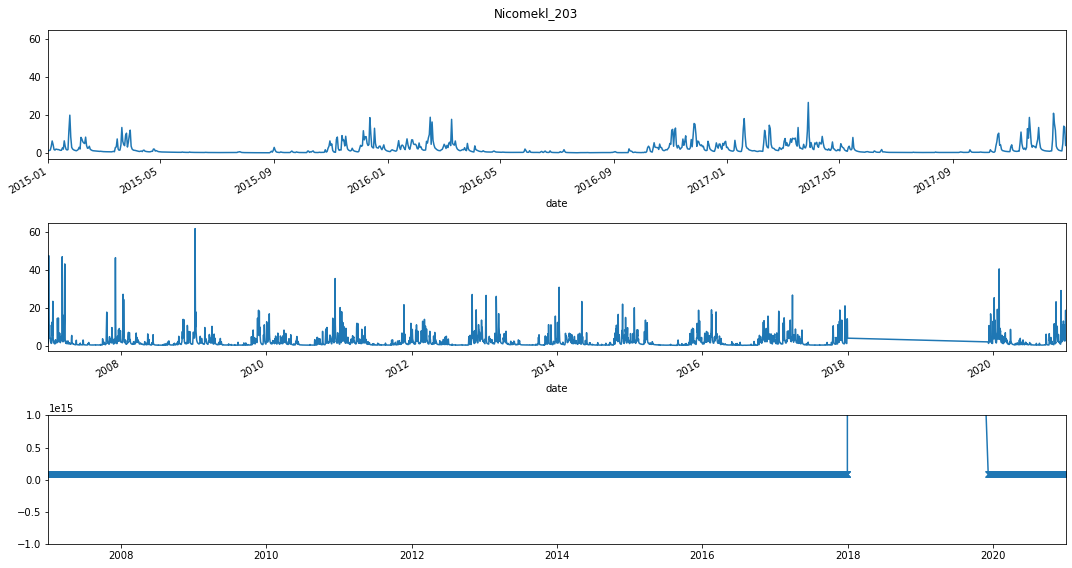

In [156]:
primary_river_name = 'Nicomekl_203'
river_flow = read_river(primary_river_name, 'primary')
fig, ax = plot_river(river_flow)
diffy = search_gaps(river_flow, ax)
fig.tight_layout()
river_flow.iloc[-1]